In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

# Fashio MNIST
# keras = base de données google 
fashion_mnist = tf.keras.datasets.fashion_mnist
# je récupère uniquement les images et targets
(images, targets), (images_test, targets_test) = fashion_mnist.load_data()

print("finish")

finish


In [2]:
# Get only a subpart of the dataset
# juste les 10 000 premières lignes, shape (10 000, 28, 28) 28 étant le nombres de pixels de chaques images
# image contient mon image au format matrice avec mes valeurs de gris de 0 à 255, 28 lignes de 28 valeurs
# target lui est la valeur de la catégorie associé à mon image, ex: 0 = tee shirt
images_train = images
targets_train = targets

print(images_train.shape)
print(targets_train.shape)
print(images_test.shape)
print(targets_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
# ici je transforme ma matrice de 28/28 en un vecteur de 784 entrées (28x28)
# que je convertis en float pour être sûr du type de mes data
images_train = images.reshape(-1, 784)
images_train = images_train.astype(float)

images_test = images_test.reshape(-1, 784)
images_test = images_test.astype(float)

print(images_train.shape)

(60000, 784)


In [4]:
'''
L’idée est la suivante, on ramène toutes les valeurs de la variable entre 0 et 1,
tout en conservant les distances entre les valeurs.
Pour ce qui est de la standardisation, la transformation est plus subtile 
que simplement ramener l’ensemble des valeurs entre 0 et 1,
elle a pour but de ramener la moyenne μ à 0 et l’écart-type σ à 1
Travailler avec des données d’échelles variables peut constituer un problème dans l’analyse en ce sens
qu’une variable numérique dont la plage de valeurs est comprise entre 0 et 10000 sera plus pesante dans l’analyse 
qu’une variable dont les valeurs sont comprises entre 0 et 1 ce qui causerait un problème de biais par la suite. 
'''

'''
fit_ trasnform calcule la moyenne et l'écart type des données puis les réajuste selon cette moyenne et cet écart type. 
Donc si on réutilise fit_transofrm sur la validation,
potentiellement on va obtenir des données avec une moyenne légèrement différente et un écart type différent. 
Or il est préférable que les données de validation soient normalisé selon les mêmes paramètres que l'entraînement.
'''

# ici je normalise mes data pour avoir un écart moins important entre elles afin de les traiter plus rapidement
# et ajuster mes poids de manière bien plus rapide
scaler = StandardScaler()
images_train = scaler.fit_transform(images_train)
images_test = scaler.transform(images_test)

print(images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

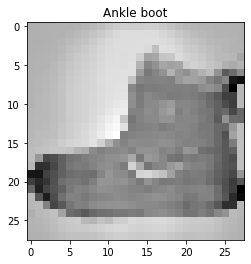

In [5]:
# liste des valeurs possibles de targets de mon dataset
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Plot one image
# reconstitue mon image en 28/28, cmap est pour le choix de couleur ici nuance de gris
plt.imshow(np.reshape(images_train[0], (28, 28)), cmap="binary")
# récupère la valeur de targets pour mon image (9 dans ma liste = "Ankle boot")
plt.title(targets_names[targets_train[0]])
plt.show()

In [6]:
model = tf.keras.models.Sequential()

# Add the layers
# couche de neurones ici 3 avant de donner le résultat pour ma première valeur
# l'activation softmax me permet d'obtenir une valeur global sur mon dernier layer de 10 neurones qui sera
# égale à 1 lors de l'addition des 10 valeurs de neurones, ex : 1 = 0.05, 2 = 0.05... 9 = 0.80
# permet d'avoir une seule valeur dominante et ne pas risquer d'avoir 1 = 0.50, 2 = 0.50... 9 = 0.70
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model_output = model.predict(images_train[0:1])
print(model_output, targets_train[0:1])

1/1 [==============================] - 0s 163ms/step
[[0.04027247 0.01335121 0.06468822 0.02889069 0.06917637 0.07378733
  0.30337086 0.25297287 0.12989622 0.02359376]] [9]


In [7]:
# Compile the model
# le loss avec cette valeur permet d'indiquer qu'on prend la valeur de target soit par ex 9
# avec "categorical_crossentropy" on aurait une représentation  de nos 9 valeurs possibles sous ce format : 
# [0,0,0,0,0,0,0,0,1] pour 9
# [1,0,0,0,0,0,0,0,0] pour 0
# la fonction d'erreur "loss" est variable en fonction du dataset analysé et du résultat attendu en sortie
# ici on a plusieurs valeurs en sorties donc "sparse_categorical_crossentropy" est indiqué
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)
print("finish")

finish


In [8]:
# lance les entrainement sur mon dataset d'entrainement 10 fois, puis utilise le dataset de validation à partir
# de images_test, targets_test
# ici j'utilise "validation_data" mais je peux aussi utiliser un "validation_split" avec en valeur un pourcentage
# compris entre 0 et 1 (ex: 0.2) pour qu'il prenne un certain pourcentage de mon dataset d'entrainement, ici 20%
# je vais avoir deux valeurs à surveiller "accuracy" et "val_accuracy", la première est la justesse de 
# mon dataset d'entrainement, et la deuxième est la justesse avec mon dataset de validation
# ex : accuracy: 0.8202, val_accuracy: 0.8457
history = model.fit(images_train, targets_train, epochs=15, validation_data=(images_test, targets_test))

Epoch 1/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5101 - accuracy: 0.8207 - val_loss: 0.4259 - val_accuracy: 0.8497
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3622 - accuracy: 0.8713 - val_loss: 0.3842 - val_accuracy: 0.8626
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3237 - accuracy: 0.8833 - val_loss: 0.3729 - val_accuracy: 0.8679
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2983 - accuracy: 0.8918 - val_loss: 0.3553 - val_accuracy: 0.8715
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2783 - accuracy: 0.8997 - val_loss: 0.3521 - val_accuracy: 0.8747
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2625 - accuracy: 0.9051 - val_loss: 0.3467 - val_accuracy: 0.8761
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2478 - accuracy: 0.9115 - val_loss: 0.3446 - val_accuracy:

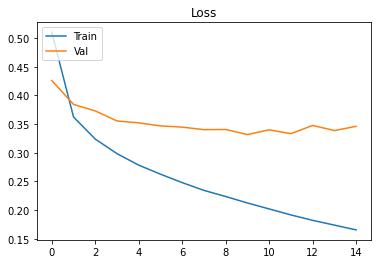

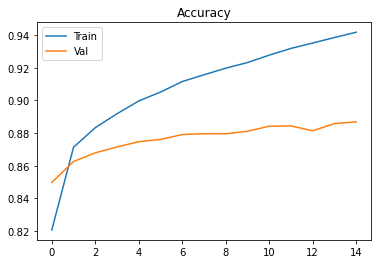

In [9]:
# le loss va me servir pour mesurer l'écart entre la valeur résultant de mon training et la valeur attendu
# cette valeur sera calculé pour le trainig et la validation 
# loss: 0.1636 et val_loss: 0.3456

# accuracy sera le pourcentage de réussite de mon IA en training et en validation

loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [ ]:
# Pour sauvegarder mon model de machine learning
# pip install h5py

model.save("check_vetements.h5")

# pour le charger afin de l'utiliser
model_check_vetements = tf.keras.models.load_model("check_vetements.h5")

# POur l'utiliser avec un nouveau jeu de données 
loss, acc = model_check_vetements.evaluate(images_test, targets_test)
print("loss", loss)
print("acc", acc)